In [56]:
import math
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data=pd.read_csv("ds_salaries.csv")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [59]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [60]:
data.corr(numeric_only = True)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.094724,0.228290,-0.236430
salary,-0.094724,1.000000,-0.023676,0.028731
salary_in_usd,0.228290,-0.023676,1.000000,-0.064171
remote_ratio,-0.236430,0.028731,-0.064171,1.000000


In [61]:
column_names=data.columns
column_names

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [62]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [63]:
data.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1550,2023,SE,FT,Data Scientist,257000,USD,257000,US,0,US,M
3672,2021,SE,FT,Machine Learning Infrastructure Engineer,195000,USD,195000,US,100,US,M
1747,2023,SE,FT,Research Scientist,200000,USD,200000,US,0,US,M
3011,2022,SE,FT,Data Engineer,135000,USD,135000,PR,100,PR,M
1361,2023,SE,FT,Data Engineer,126000,USD,126000,US,0,US,M


In [64]:
[(f"{i}:",data[i].unique()) for i in column_names if data[i].dtype==object]

[('experience_level:', array(['SE', 'MI', 'EN', 'EX'], dtype=object)),
 ('employment_type:', array(['FT', 'CT', 'FL', 'PT'], dtype=object)),
 ('job_title:',
  array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
         'Applied Scientist', 'Data Analyst', 'Data Modeler',
         'Research Engineer', 'Analytics Engineer',
         'Business Intelligence Engineer', 'Machine Learning Engineer',
         'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
         'Data Quality Analyst', 'Compliance Data Analyst',
         'Data Architect', 'Applied Machine Learning Engineer',
         'AI Developer', 'Research Scientist', 'Data Analytics Manager',
         'Business Data Analyst', 'Applied Data Scientist',
         'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
         'Head of Data', 'Data Science Manager', 'Data Manager',
         'Machine Learning Researcher', 'Big Data Engineer',
         'Data Specialist', 'Lead Data Analyst', 'BI Data En

In [65]:
data=data.sort_values(by=["salary_in_usd"],ascending=True)

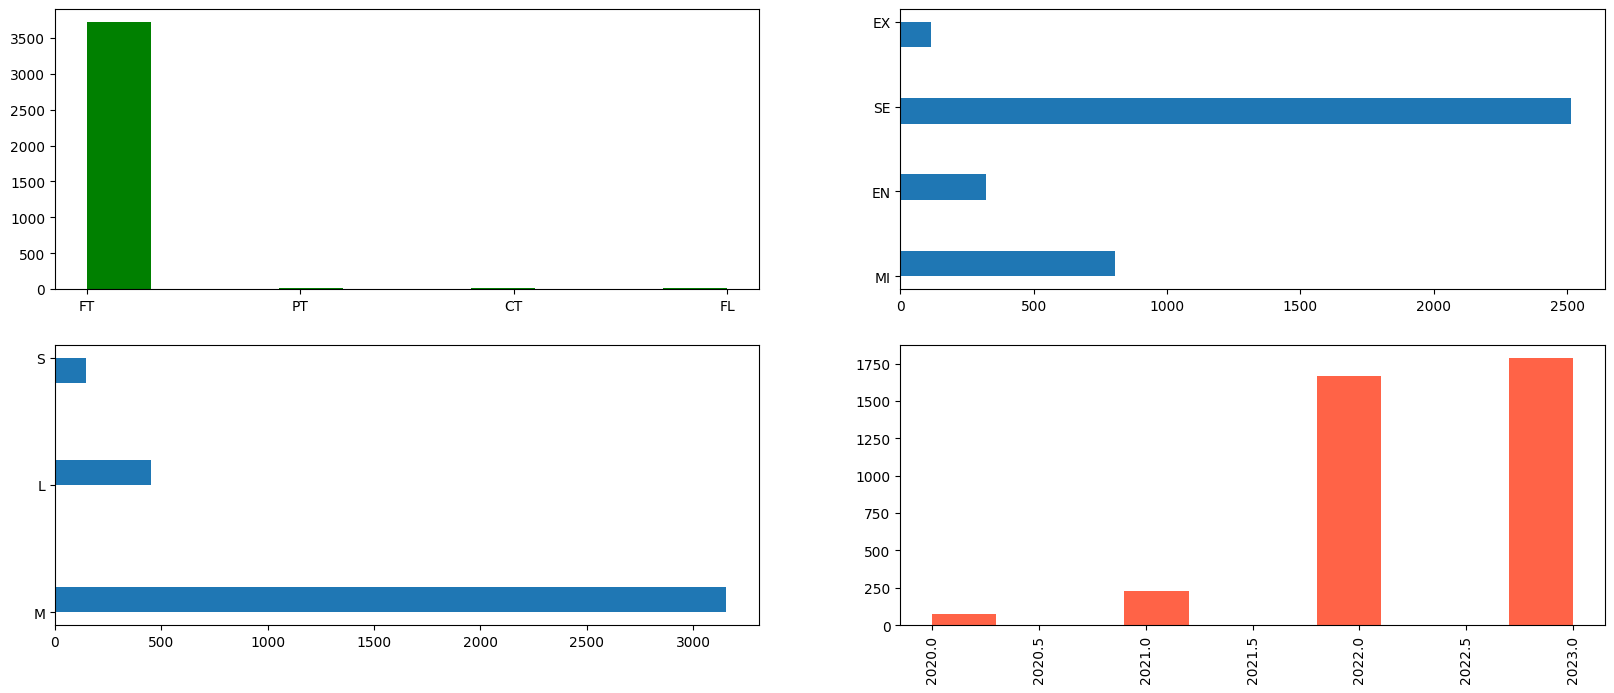

In [66]:
fig,ax=plt.subplots(2,2,figsize=(20, 8))
ax[0,0].hist(data["employment_type"],orientation="vertical",color="green")
ax[0,1].hist(data["experience_level"],orientation="horizontal")
ax[1,0].hist(data["company_size"],orientation="horizontal")
ax[1,1].hist(data["work_year"],orientation="vertical",color="tomato")
plt.xticks(rotation=90)
plt.show()

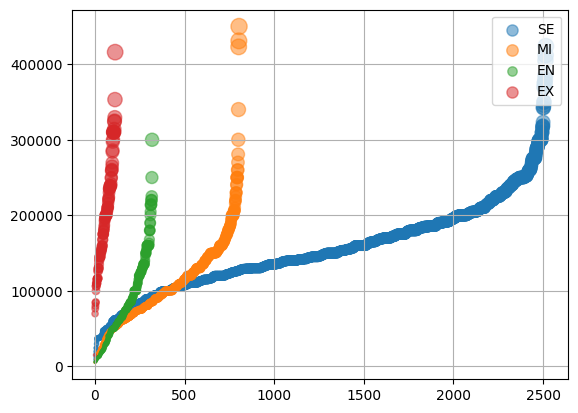

In [67]:
plt.scatter(np.arange(data[data["experience_level"]=="SE"].shape[0]),data[data["experience_level"]=="SE"]["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["experience_level"]=="SE"]["salary_in_usd"],np.ones(data[data["experience_level"]=="SE"].shape[0])*0.0003),label="SE")
plt.scatter(np.arange(data[data["experience_level"]=="MI"].shape[0]),data[data["experience_level"]=="MI"]["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["experience_level"]=="MI"]["salary_in_usd"],np.ones(data[data["experience_level"]=="MI"].shape[0])*0.0003),label="MI")
plt.scatter(np.arange(data[data["experience_level"]=="EN"].shape[0]),data[data["experience_level"]=="EN"]["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["experience_level"]=="EN"]["salary_in_usd"],np.ones(data[data["experience_level"]=="EN"].shape[0])*0.0003),label="EN")
plt.scatter(np.arange(data[data["experience_level"]=="EX"].shape[0]),data[data["experience_level"]=="EX"]["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["experience_level"]=="EX"]["salary_in_usd"],np.ones(data[data["experience_level"]=="EX"].shape[0])*0.0003),label="EX")
plt.legend(loc="upper right",)
plt.grid()
plt.show()


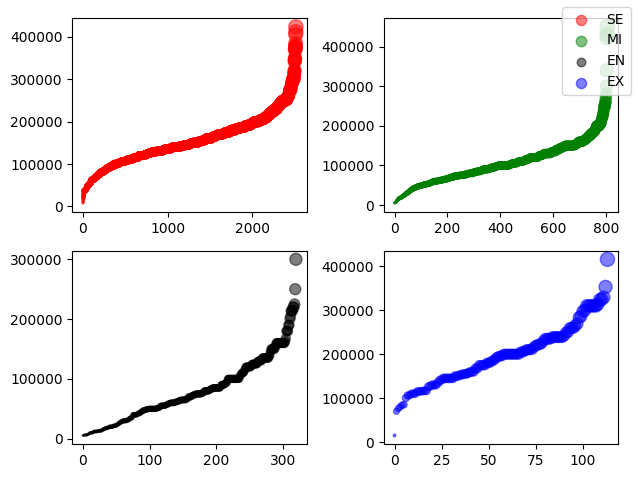

In [68]:
fig,ax=plt.subplots(2,2)
labels=["SE","MI","EN","EX"]
f1=ax[0,0].scatter(np.arange(data[data["experience_level"]=="SE"].shape[0]),data[data["experience_level"]=="SE"]["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["experience_level"]=="SE"]["salary_in_usd"],np.ones(data[data["experience_level"]=="SE"].shape[0])*0.00025),c="red")
f2=ax[0,1].scatter(np.arange(data[data["experience_level"]=="MI"].shape[0]),data[data["experience_level"]=="MI"]["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["experience_level"]=="MI"]["salary_in_usd"],np.ones(data[data["experience_level"]=="MI"].shape[0])*0.00025),c="green")
f3=ax[1,0].scatter(np.arange(data[data["experience_level"]=="EN"].shape[0]),data[data["experience_level"]=="EN"]["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["experience_level"]=="EN"]["salary_in_usd"],np.ones(data[data["experience_level"]=="EN"].shape[0])*0.00025),c="black")
f4=ax[1,1].scatter(np.arange(data[data["experience_level"]=="EX"].shape[0]),data[data["experience_level"]=="EX"]["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["experience_level"]=="EX"]["salary_in_usd"],np.ones(data[data["experience_level"]=="EX"].shape[0])*0.00025),c="blue")

fig.legend([f1,f2,f3,f4],labels,loc="upper right")
plt.tight_layout()
plt.show()

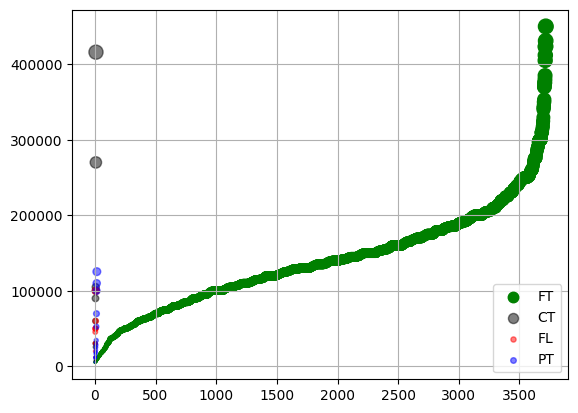

In [69]:
plt.scatter(np.arange(data[data["employment_type"]=='FT'].shape[0]),data[data["employment_type"]=='FT']["salary_in_usd"],sizes=np.multiply(data[data["employment_type"]=='FT']["salary_in_usd"],np.ones(data[data["employment_type"]=='FT'].shape[0])*0.00025),c="green",label="FT")
plt.scatter(np.arange(data[data["employment_type"]=='CT'].shape[0]),data[data["employment_type"]=='CT']["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["employment_type"]=='CT']["salary_in_usd"],np.ones(data[data["employment_type"]=='CT'].shape[0])*0.00025),c="black",label="CT")
plt.scatter(np.arange(data[data["employment_type"]=='FL'].shape[0]),data[data["employment_type"]=='FL']["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["employment_type"]=='FL']["salary_in_usd"],np.ones(data[data["employment_type"]=='FL'].shape[0])*0.00025),c="red",label="FL")
plt.scatter(np.arange(data[data["employment_type"]=='PT'].shape[0]),data[data["employment_type"]=='PT']["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["employment_type"]=='PT']["salary_in_usd"],np.ones(data[data["employment_type"]=='PT'].shape[0])*0.00025),c="blue",label="PT")
plt.legend(loc="best")
plt.grid()
plt.show()

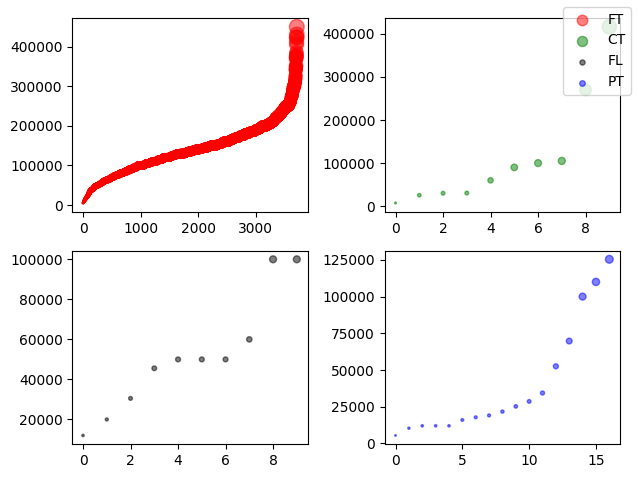

In [70]:
fig,ax=plt.subplots(2,2)
labels=['FT', 'CT', 'FL', 'PT']
f1=ax[0,0].scatter(np.arange(data[data["employment_type"]=='FT'].shape[0]),data[data["employment_type"]=='FT']["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["employment_type"]=='FT']["salary_in_usd"],np.ones(data[data["employment_type"]=='FT'].shape[0])*0.00025),c="red")
f2=ax[0,1].scatter(np.arange(data[data["employment_type"]=='CT'].shape[0]),data[data["employment_type"]=='CT']["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["employment_type"]=='CT']["salary_in_usd"],np.ones(data[data["employment_type"]=='CT'].shape[0])*0.00025),c="green")
f3=ax[1,0].scatter(np.arange(data[data["employment_type"]=='FL'].shape[0]),data[data["employment_type"]=='FL']["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["employment_type"]=='FL']["salary_in_usd"],np.ones(data[data["employment_type"]=='FL'].shape[0])*0.00025),c="black")
f4=ax[1,1].scatter(np.arange(data[data["employment_type"]=='PT'].shape[0]),data[data["employment_type"]=='PT']["salary_in_usd"],alpha=0.5,sizes=np.multiply(data[data["employment_type"]=='PT']["salary_in_usd"],np.ones(data[data["employment_type"]=='PT'].shape[0])*0.00025),c="blue")

fig.legend([f1,f2,f3,f4],labels,loc="upper right")
plt.tight_layout()
plt.show()

In [72]:
def build_combinations(x):
    comb=[]
    for i in itertools.combinations_with_replacement(reversed(np.arange(x)),2):
        comb.append(i)
    for i in itertools.combinations_with_replacement(np.arange(x),2):
        comb.append(i)
    return list(set(comb))

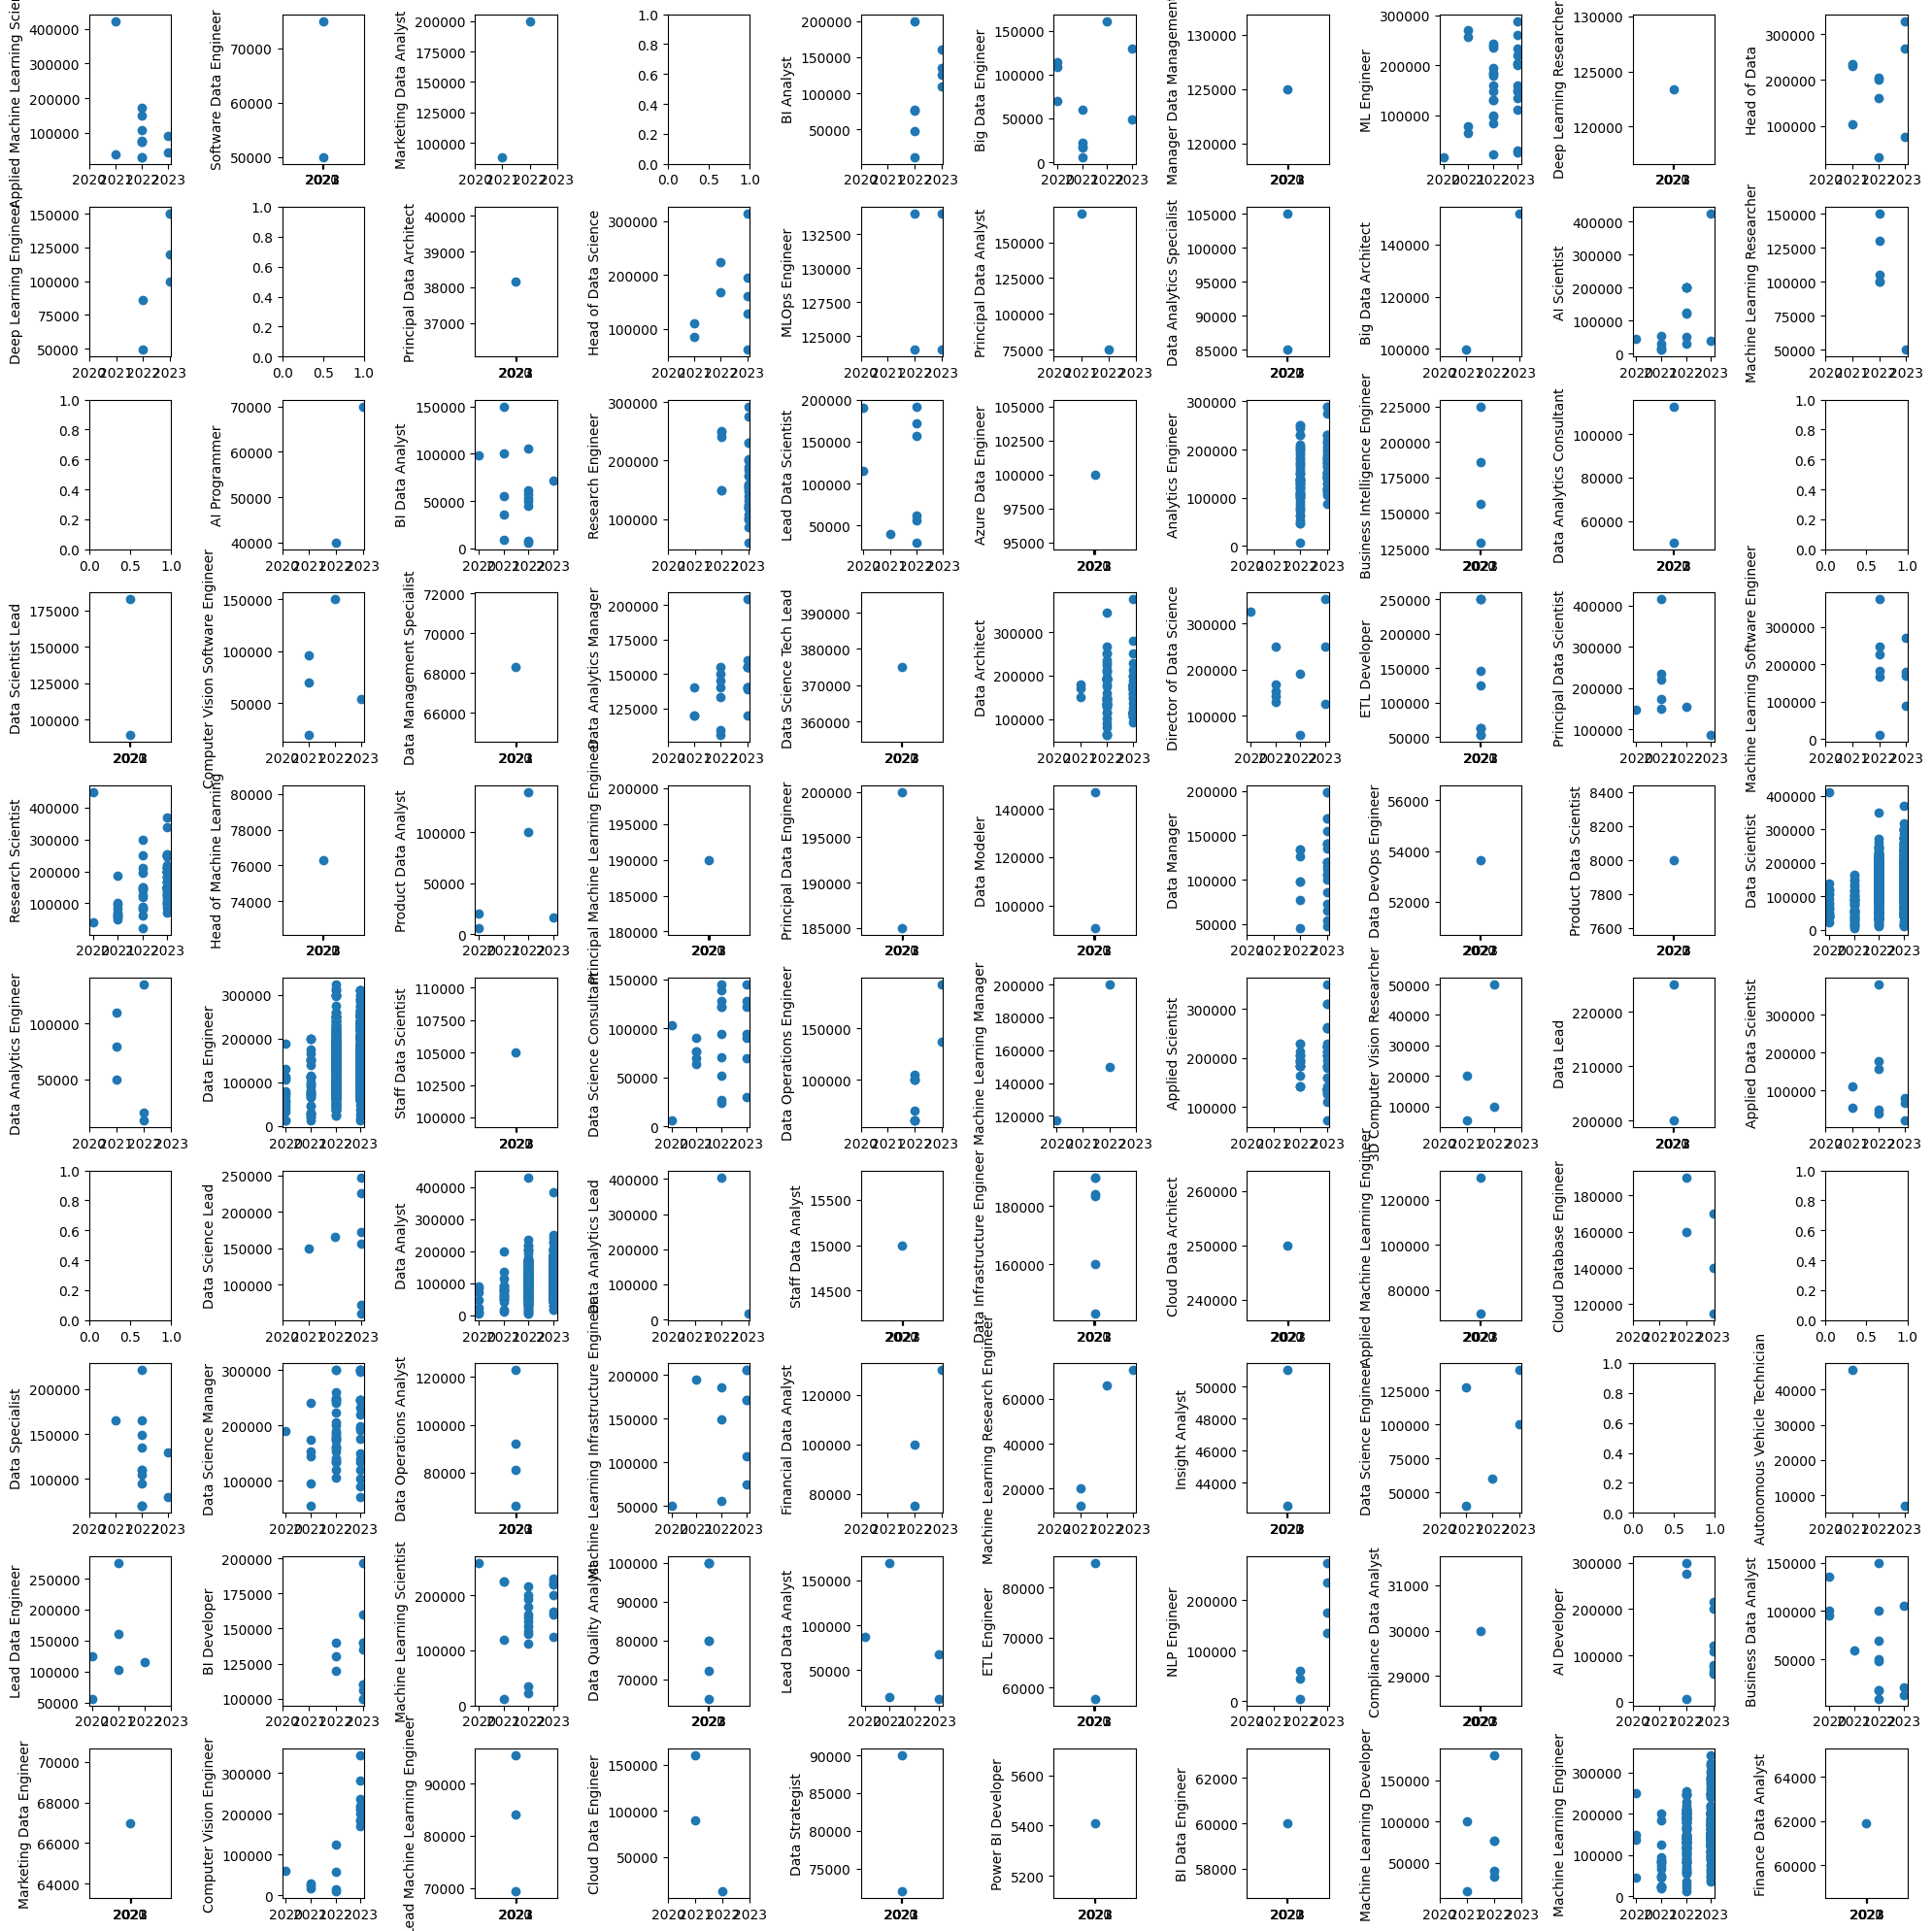

In [86]:
data=data.sort_values(by=["work_year"],ascending=True)
job_roles=data["job_title"].unique()
x=math.ceil(len(job_roles)**0.5)
combs=build_combinations(x)
fig,ax=plt.subplots(x,x,figsize=(x+x,20))
for role ,comb in zip(job_roles,combs):
    role_data=data[data["job_title"]==role]
    role_data=role_data.sort_values(by=["work_year"],ascending=True)
    ax[comb[0],comb[1]].scatter(role_data["work_year"],data[data["job_title"]==role]["salary_in_usd"])
    ax[comb[0],comb[1]].set_ylabel(role)
    ax[comb[0],comb[1]].set_xticks(data["work_year"].unique(),rotation="vertical")
    
plt.tight_layout()

In [83]:
data["work_year"].unique()

array([2020, 2021, 2022, 2023], dtype=int64)

In [52]:
build_combinations(3)

{(0, 1), (1, 2), (2, 1), (0, 0), (1, 1), (2, 0), (0, 2), (2, 2), (1, 0)}


In [55]:



math.ceil(5.9)

6